In [1]:
!git clone https://github.com/reubenwenisch/yolo.git

Cloning into 'yolo'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 160 (delta 9), reused 160 (delta 9), pack-reused 0
Receiving objects: 100% (160/160), 12.74 MiB | 4.17 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load the merged and annotated data

In [4]:
# !unzip /content/gdrive/MyDrive/data/customdata_reu.zip -d /content/yolo/data

In [5]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [6]:
ls

gdrive/  sample_data/  yolo/


In [7]:
cd yolo/

/content/yolo


In [10]:
!mkdir weights
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights


In [11]:
!cp -r /content/gdrive/MyDrive/data/yolov3_models/yolov3-spp-ultralytics.pt /content/yolo/weights/yolov3-spp-ultralytics.pt

In [12]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2945 found, 131 missing, 38 empty, 0 duplicate, for 3114 images): 100% 3114/3114 [00:00<00:00, 4686.54it/s]
Caching images (1.7GB): 100% 3114/3114 [00:22<00:00, 137.61it/s]
Reading image shapes: 100% 400/400 [00:00<00:00, 3173.20it/s]
Caching labels (379 found, 14 missing, 7 empty, 0 duplicate, for 400 images): 100% 400/400 [00:00<00:00, 4704.69it/s]
Caching images (0.1GB): 100% 400/400 [00:03<00:00, 126.02

## Create Video

In [13]:
!mkdir video
!mkdir video_out
!cp /content/gdrive/MyDrive/data/video.mp4 /content/yolo/video/video.mp4
!ffmpeg -i video/video.mp4 video/image-%03d.jpg

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [18]:
!python detect.py --conf-thres 0.3 --source video --output video_out

Streaming output truncated to the last 5000 lines.
image 3931/4465 video/image-466.jpg: 512x320 1 vests, Done. (0.089s)
image 3932/4465 video/image-467.jpg: 512x320 1 vests, Done. (0.088s)
image 3933/4465 video/image-468.jpg: 512x320 Done. (0.088s)
image 3934/4465 video/image-469.jpg: 512x320 Done. (0.086s)
image 3935/4465 video/image-470.jpg: 512x320 1 vests, Done. (0.088s)
image 3936/4465 video/image-471.jpg: 512x320 2 vests, Done. (0.088s)
image 3937/4465 video/image-472.jpg: 512x320 1 vests, Done. (0.088s)
image 3938/4465 video/image-473.jpg: 512x320 1 vests, Done. (0.088s)
image 3939/4465 video/image-474.jpg: 512x320 1 vests, Done. (0.087s)
image 3940/4465 video/image-475.jpg: 512x320 1 vests, Done. (0.087s)
image 3941/4465 video/image-476.jpg: 512x320 1 vests, Done. (0.088s)
image 3942/4465 video/image-477.jpg: 512x320 1 vests, Done. (0.088s)
image 3943/4465 video/image-478.jpg: 512x320 1 vests, Done. (0.088s)
image 3944/4465 video/image-479.jpg: 512x320 2 vests, Done. (0.089s)
i

In [23]:
!ffmpeg -i video_out/image-%03d.jpg video_out.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [24]:
!cp /content/yolo/video_out.mp4 /content/gdrive/MyDrive/data/video_out.mp4

In [ ]:
# python train.py --data data/smalcoco/smalcoco.data --batch 10 --cache --epochs 25 --nosave

In [ ]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 2042.46it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 110.73it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 4344.85it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 93.18it/s]
Image sizes 512 - 512 train, 512 test
Using 2 dataloader workers
Starting training 

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1990      0 --:--:-- --:--:-- --:--:--  1990
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0    

In [ ]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (22) The requested URL returned error: 404 Not Found
rm: cannot remove 'weights/last.pt': No such file or directory
Traceback (most recent call last):
  File "detect.py", line 186, in <module>
    detect()
  File "detect.py", line 24, in detect
    attempt_download(weights)
  File "

In [ ]:
Image(filename='out_out/img001.jpg', width=600)

FileNotFoundError: ignored

In [ ]:
Image(filename='out_out/img002.jpg', width=600)

FileNotFoundError: ignored

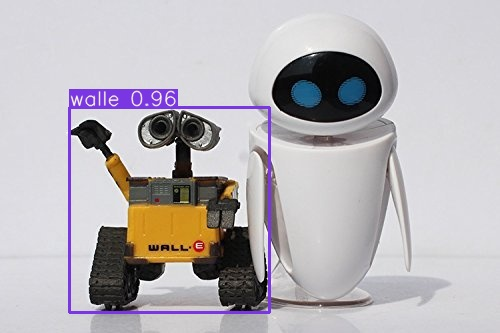

In [ ]:
Image(filename='out_out/img003.jpg', width=600)

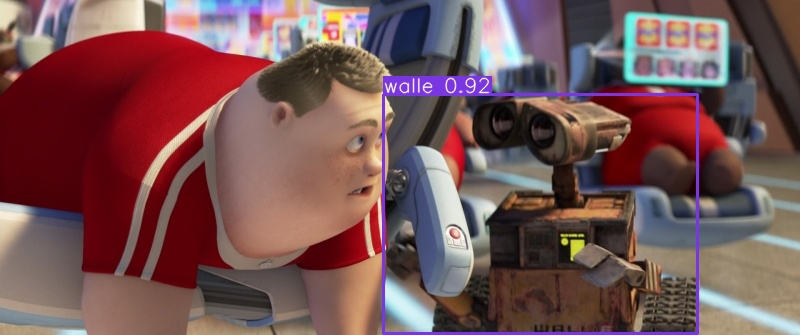

In [ ]:
Image(filename='out_out/img020.jpg', width=600)